In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.ticker import LogLocator
from matplotlib.lines import Line2D
from copy import deepcopy
import torch 
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import os
import time
import gc
import scipy
from scipy.signal import butter, filtfilt, argrelextrema
from scipy.interpolate import interp1d
from mup import MuReadout, MuSGD, MuAdam
import mup as mup
from pathlib import Path
import nbimporter
import post_processing_lib as pp

In [2]:
# improve the ploting style
rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = 22
rcParams['mathtext.fontset'] = 'stix'

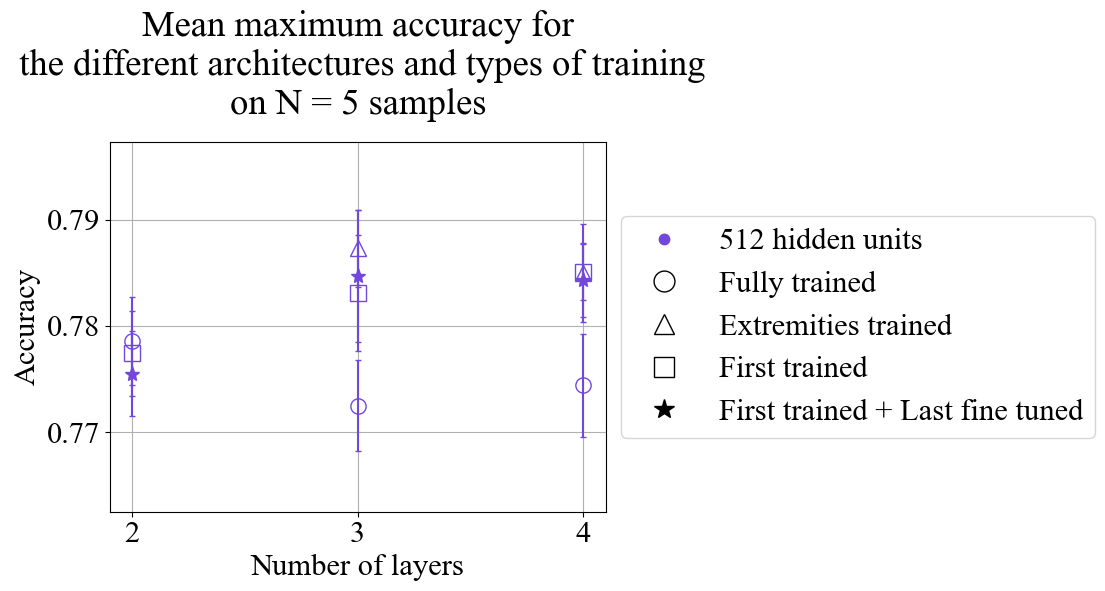

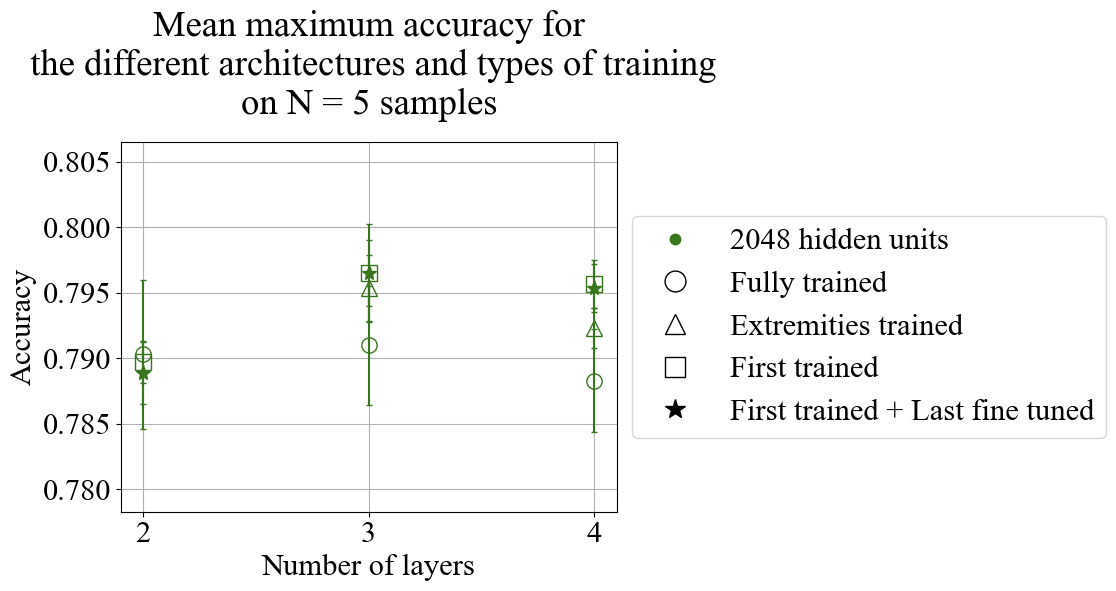

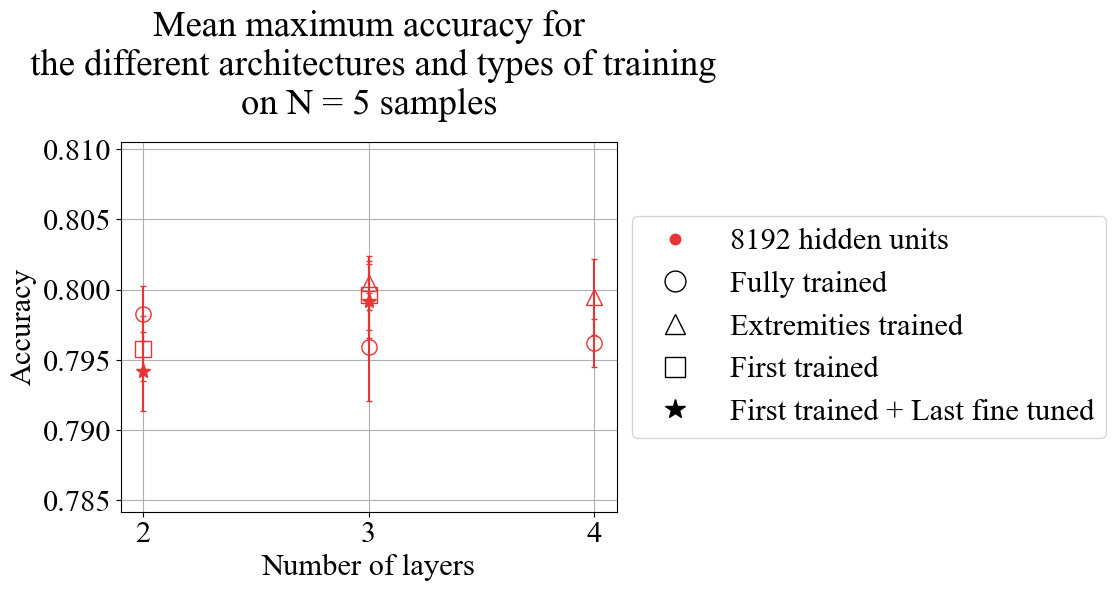

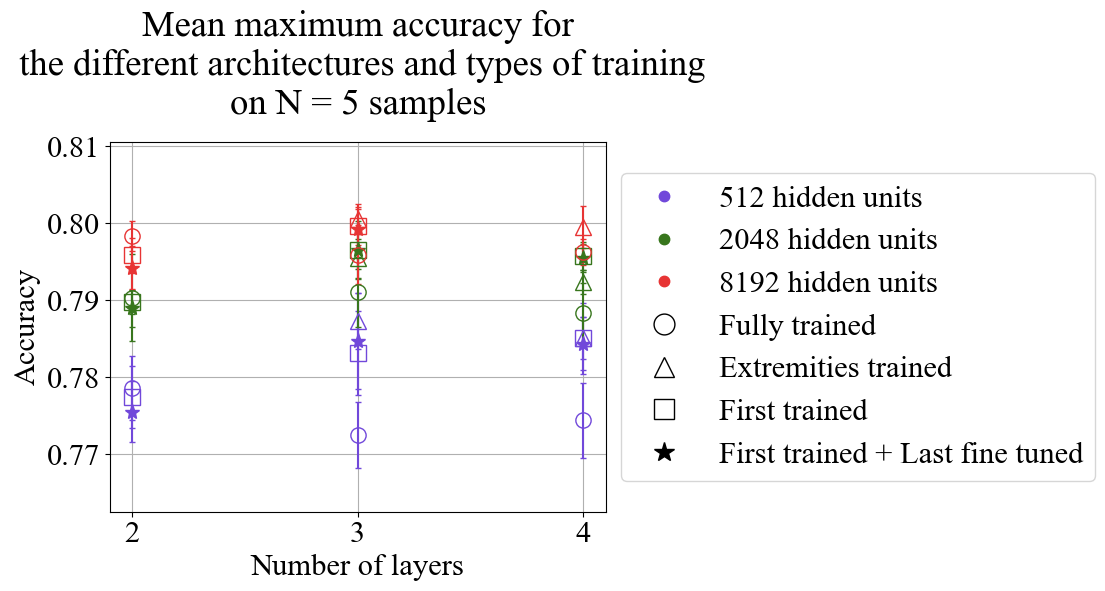

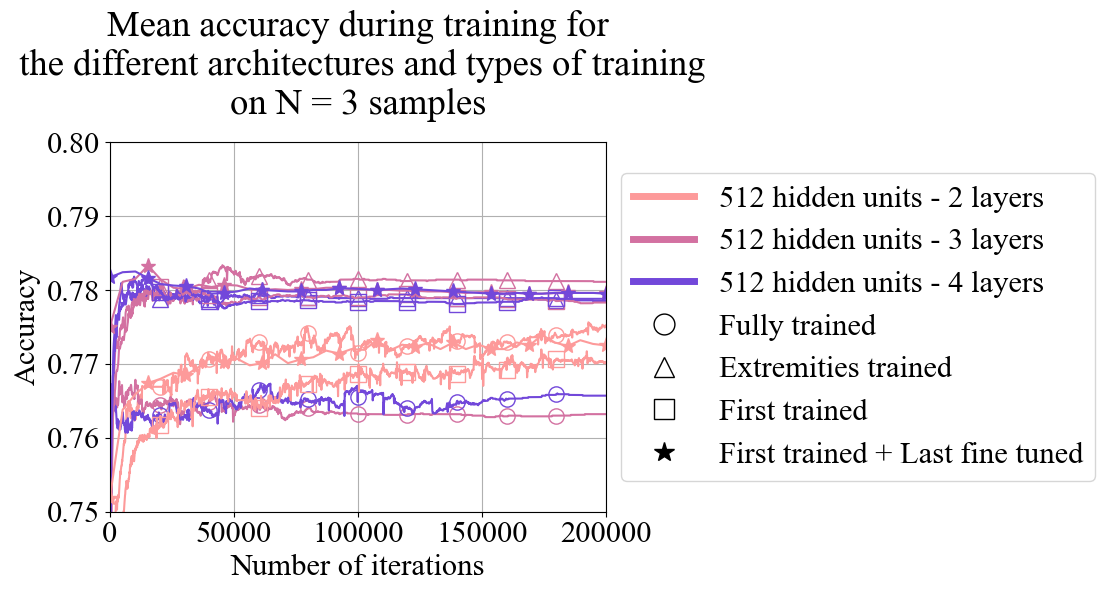

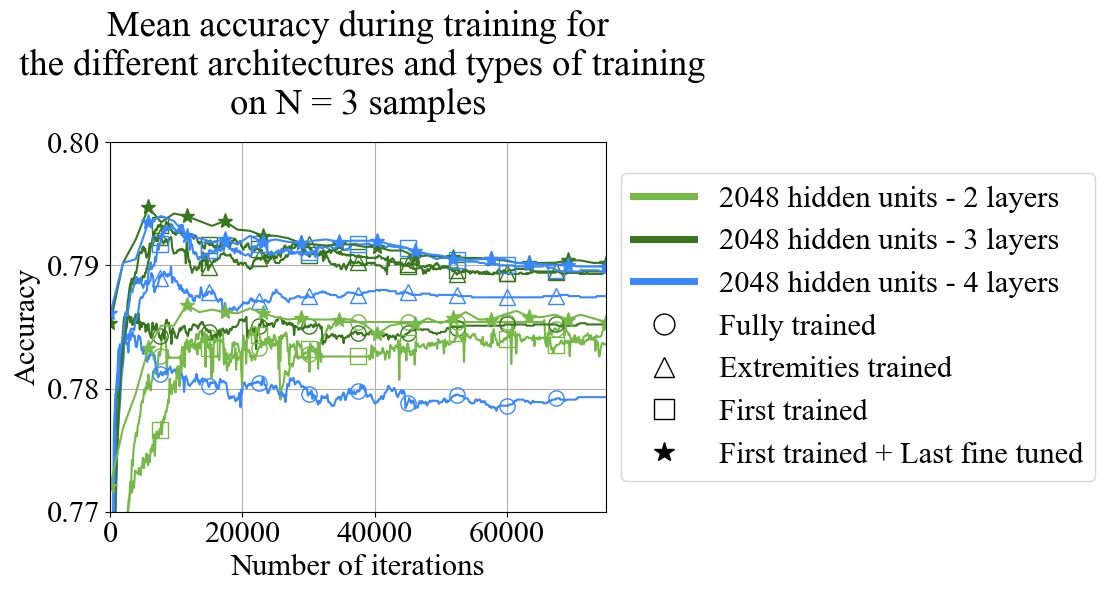

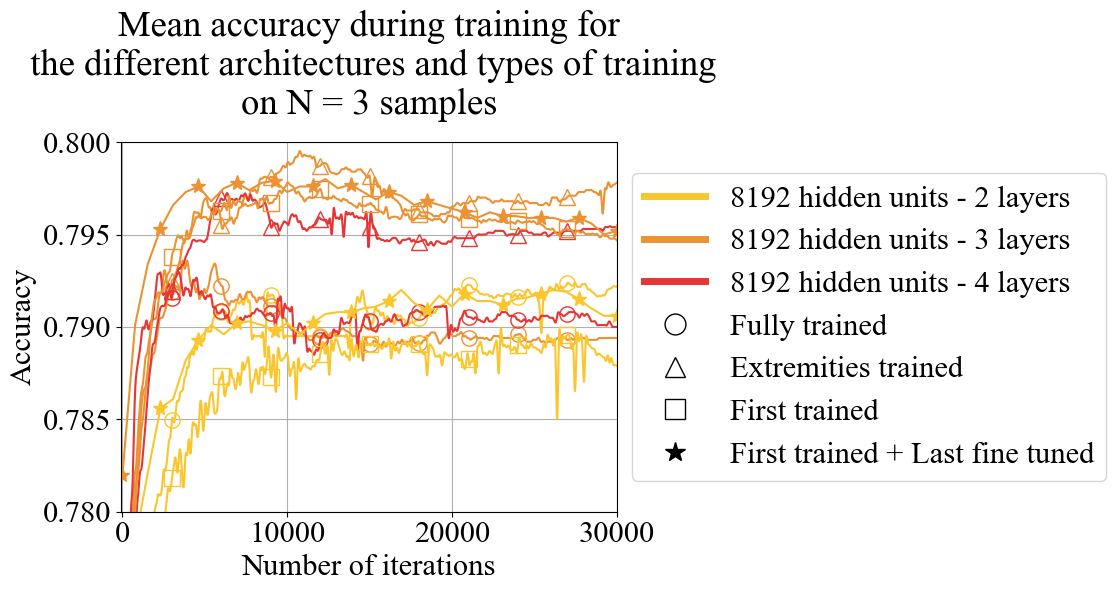

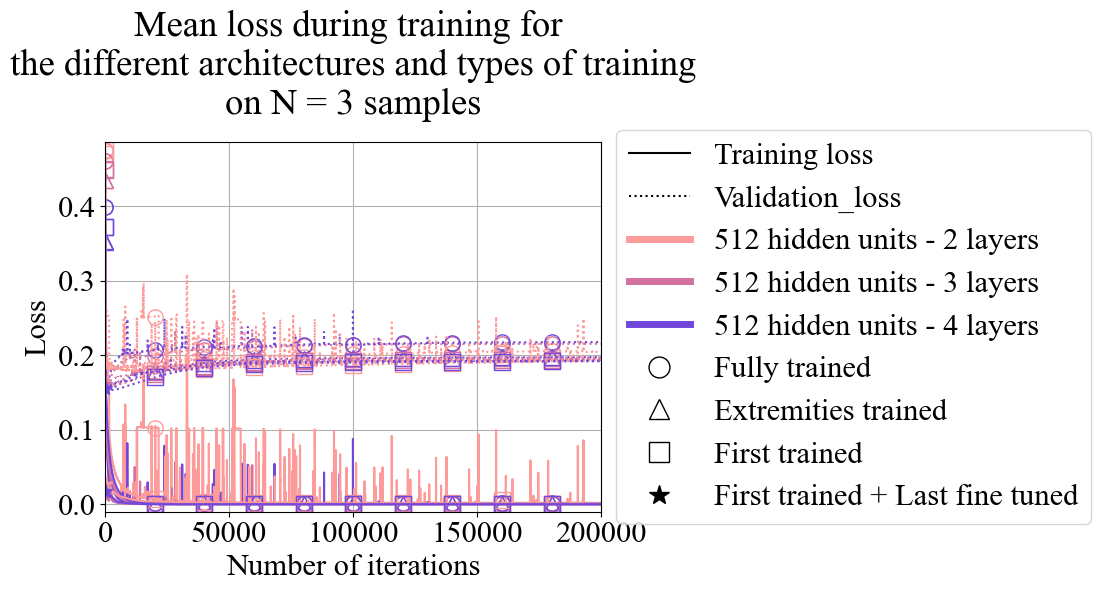

In [3]:
##### 08/07 - Statistical plots on CIFAR-10 : car-plane #####

date = '09_07_25'

dataset = 'elk-horse'

save_path = 'Post-processing/15_07_25/'
save_path_convergence_speed = save_path + 'Convergence speed/Dataset_' + dataset + '_statistical_results/'
save_path_normalized_convergence_speed = save_path + 'Normalized convergence speed/Dataset_' + dataset + '_statistical_results/'
save_path_max_accuracy = save_path + 'Maximum accuracy/Dataset_' + dataset + '_statistical_results/'
save_path_accuracy_trajectory = save_path + 'Accuracy trajectory/Dataset_' + dataset + '_statistical_results/'
save_path_loss_trajectory = save_path + 'Loss trajectory/Dataset_' + dataset + '_statistical_results/'

os.makedirs(save_path_convergence_speed, exist_ok=True)
os.makedirs(save_path_normalized_convergence_speed, exist_ok=True)
os.makedirs(save_path_max_accuracy, exist_ok=True)
os.makedirs(save_path_accuracy_trajectory, exist_ok=True)
os.makedirs(save_path_loss_trajectory, exist_ok=True)

# Plot the performances

model_ref_1_multi_save = pp.load_multi_saves_data_dictionnary("CIFAR10_torch_model_(1024+512.1+1)_" + dataset, date)
model_1_multi_save = pp.load_multi_saves_data_dictionnary("CIFAR10_torch_model_(1024+512.2+1)_" + dataset, date)
model_2_multi_save = pp.load_multi_saves_data_dictionnary("CIFAR10_torch_model_(1024+512.3+1)_" + dataset, date)
model_3_multi_save = pp.load_multi_saves_data_dictionnary("CIFAR10_torch_model_(1024+512-512.1+1)_" + dataset, date)
model_4_multi_save = pp.load_multi_saves_data_dictionnary("CIFAR10_torch_model_(1024+512-512.2+1)_" + dataset, date)
model_5_multi_save = pp.load_multi_saves_data_dictionnary("CIFAR10_torch_model_(1024+512-512.0-1)_" + dataset, date)
model_6_multi_save = pp.load_multi_saves_data_dictionnary("CIFAR10_torch_model_(1024+512-512.1-1)_" + dataset, date)
model_7_multi_save = pp.load_multi_saves_data_dictionnary("CIFAR10_torch_model_(1024+512-512.2-1)_" + dataset, date)

model_ref_2_multi_save = pp.load_multi_saves_data_dictionnary("CIFAR10_torch_model_(1024+2048.1+1)_" + dataset, date)
model_8_multi_save = pp.load_multi_saves_data_dictionnary("CIFAR10_torch_model_(1024+2048.2+1)_" + dataset, date)
model_9_multi_save = pp.load_multi_saves_data_dictionnary("CIFAR10_torch_model_(1024+2048.3+1)_" + dataset, date)
model_10_multi_save = pp.load_multi_saves_data_dictionnary("CIFAR10_torch_model_(1024+2048-2048.1+1)_" + dataset, date)
model_11_multi_save = pp.load_multi_saves_data_dictionnary("CIFAR10_torch_model_(1024+2048-2048.2+1)_" + dataset, date)
model_12_multi_save = pp.load_multi_saves_data_dictionnary("CIFAR10_torch_model_(1024+2048-2048.0-1)_" + dataset, date)
model_13_multi_save = pp.load_multi_saves_data_dictionnary("CIFAR10_torch_model_(1024+2048-2048.1-1)_" + dataset, date)
model_14_multi_save = pp.load_multi_saves_data_dictionnary("CIFAR10_torch_model_(1024+2048-2048.2-1)_" + dataset, date)

model_ref_3_multi_save = pp.load_multi_saves_data_dictionnary("CIFAR10_torch_model_(1024+8192.1+1)_" + dataset, date)
model_15_multi_save = pp.load_multi_saves_data_dictionnary("CIFAR10_torch_model_(1024+8192.2+1)_" + dataset, date)
model_16_multi_save = pp.load_multi_saves_data_dictionnary("CIFAR10_torch_model_(1024+8192.3+1)_" + dataset, date)
model_17_multi_save = pp.load_multi_saves_data_dictionnary("CIFAR10_torch_model_(1024+8192-8192.1+1)_" + dataset, date)
model_18_multi_save = pp.load_multi_saves_data_dictionnary("CIFAR10_torch_model_(1024+8192-8192.2+1)_" + dataset, date)
model_19_multi_save = pp.load_multi_saves_data_dictionnary("CIFAR10_torch_model_(1024+8192-8192.0-1)_" + dataset, date)
model_20_multi_save = pp.load_multi_saves_data_dictionnary("CIFAR10_torch_model_(1024+8192-8192.1-1)_" + dataset, date)

model_ref_1 = pp.convert_to_statistical_data_dictionnary(model_ref_1_multi_save)
model_1 = pp.convert_to_statistical_data_dictionnary(model_1_multi_save)
model_2 = pp.convert_to_statistical_data_dictionnary(model_2_multi_save)
model_3 = pp.convert_to_statistical_data_dictionnary(model_3_multi_save)
model_4 = pp.convert_to_statistical_data_dictionnary(model_4_multi_save)
model_5 = pp.convert_to_statistical_data_dictionnary(model_5_multi_save)
model_6 = pp.convert_to_statistical_data_dictionnary(model_6_multi_save)
model_7 = pp.convert_to_statistical_data_dictionnary(model_7_multi_save)

model_ref_2 = pp.convert_to_statistical_data_dictionnary(model_ref_2_multi_save)
model_8 = pp.convert_to_statistical_data_dictionnary(model_8_multi_save)
model_9 = pp.convert_to_statistical_data_dictionnary(model_9_multi_save)
model_10 = pp.convert_to_statistical_data_dictionnary(model_10_multi_save)
model_11 = pp.convert_to_statistical_data_dictionnary(model_11_multi_save)
model_12 = pp.convert_to_statistical_data_dictionnary(model_12_multi_save)
model_13 = pp.convert_to_statistical_data_dictionnary(model_13_multi_save)
model_14 = pp.convert_to_statistical_data_dictionnary(model_14_multi_save)

model_ref_3 = pp.convert_to_statistical_data_dictionnary(model_ref_3_multi_save)
model_15 = pp.convert_to_statistical_data_dictionnary(model_15_multi_save)
model_16 = pp.convert_to_statistical_data_dictionnary(model_16_multi_save)
model_17 = pp.convert_to_statistical_data_dictionnary(model_17_multi_save)
model_18 = pp.convert_to_statistical_data_dictionnary(model_18_multi_save)
model_19 = pp.convert_to_statistical_data_dictionnary(model_19_multi_save)
model_20 = pp.convert_to_statistical_data_dictionnary(model_20_multi_save)


curve_dictionnary_512hu_multi_save = {'512 hidden units' : 
                        {'Fully trained' : {'2 layers' : model_ref_1_multi_save, '3 layers' : model_1_multi_save, '4 layers' : model_2_multi_save},
                        'Extremities trained': {'3 layers' : model_3_multi_save, '4 layers' : model_4_multi_save},
                        'First trained': {'2 layers' : model_5_multi_save, '3 layers' : model_6_multi_save, '4 layers' : model_7_multi_save},
                        'First trained + Last fine tuned' : {'2 layers' : model_5_multi_save, '3 layers' : model_6_multi_save, '4 layers' : model_7_multi_save}
                         }}

curve_dictionnary_512hu= {'512 hidden units' : 
                        { 'Fully trained' : {'2 layers' : model_ref_1, '3 layers' : model_1, '4 layers' : model_2},
                        'Extremities trained': {'3 layers' : model_3, '4 layers' : model_4},
                        'First trained': {'2 layers' : model_5, '3 layers' : model_6, '4 layers' : model_7},
                        'First trained + Last fine tuned' : {'2 layers' : model_5, '3 layers' : model_6, '4 layers' : model_7}
                         }}

curve_dictionnary_2048hu_multi_save = {'2048 hidden units' : 
                        {'Fully trained' : {'2 layers' : model_ref_2_multi_save, '3 layers' : model_8_multi_save, '4 layers' : model_9_multi_save},
                        'Extremities trained': {'3 layers' : model_10_multi_save, '4 layers' : model_11_multi_save},
                        'First trained': {'2 layers' : model_12_multi_save, '3 layers' : model_13_multi_save, '4 layers' : model_14_multi_save},
                        'First trained + Last fine tuned' : {'2 layers' : model_12_multi_save, '3 layers' : model_13_multi_save, '4 layers' : model_14_multi_save}
                         }}

curve_dictionnary_2048hu = {'2048 hidden units' : 
                        {'Fully trained' : {'2 layers' : model_ref_2, '3 layers' : model_8, '4 layers' : model_9},
                        'Extremities trained': {'3 layers' : model_10, '4 layers' : model_11},
                        'First trained': {'2 layers' : model_12, '3 layers' : model_13, '4 layers' : model_14},
                        'First trained + Last fine tuned' : {'2 layers' : model_12, '3 layers' : model_13, '4 layers' : model_14}
                         }}

curve_dictionnary_8192hu_multi_save = {'8192 hidden units' : 
                        {'Fully trained' : {'2 layers' : model_ref_3_multi_save, '3 layers' : model_15_multi_save, '4 layers' : model_16_multi_save},
                        'Extremities trained': {'3 layers' : model_17_multi_save, '4 layers' : model_18_multi_save},
                        'First trained': {'2 layers' : model_19_multi_save, '3 layers' : model_20_multi_save},#, '4 layers' : model_21_multi_save},
                        'First trained + Last fine tuned' : {'2 layers' : model_19_multi_save, '3 layers' : model_20_multi_save}#, '4 layers' : model_21_multi_save}
                         }}

curve_dictionnary_8192hu = {'8192 hidden units' : 
                        {'Fully trained' : {'2 layers' : model_ref_3, '3 layers' : model_15, '4 layers' : model_16},
                        'Extremities trained': {'3 layers' : model_17, '4 layers' : model_18},
                        'First trained': {'2 layers' : model_19, '3 layers' : model_20},# '4 layers' : model_21},
                        'First trained + Last fine tuned' : {'2 layers' : model_19, '3 layers' : model_20}#, '4 layers' : model_21}
                         }}


curve_dictionnary = curve_dictionnary_512hu_multi_save | curve_dictionnary_2048hu_multi_save | curve_dictionnary_8192hu_multi_save

line_color_list = {'8192 hidden units' : {'2 layers' : 'gold', '3 layers' : 'orange', '4 layers' : 'red'},
                   '2048 hidden units' : {'2 layers' : 'olive', '3 layers' : 'cyan', '4 layers' : 'blue'}, 
                   '512 hidden units' : {'2 layers' : 'pink', '3 layers' : 'magenta', '4 layers' : 'purple'}}

color_list_1 = {'8192 hidden units' : '#e73434', 
              '2048 hidden units' : '#38761d', 
              '512 hidden units' : "#7148daff"
              }

color_list_2 = {'8192 hidden units' : {'2 layers' : "#fac62b", '3 layers' : "#eb9233", '4 layers' : "#e73434"},
                   '2048 hidden units' : {'2 layers' : "#76b947", '3 layers' : '#38761d', '4 layers' : "#3988ff"}, 
                   '512 hidden units' : {'2 layers' : "#fd9a9a", '3 layers' : "#d371a1", '4 layers' : "#7248da"}}

marker_list = {'Reference' : 'D', 'Fully trained' : 'o', 'Extremities trained' : '^', 'First trained' : 's', 'First trained + Last fine tuned' : '*'}

y_lim = [0.765, 0.79]
x_lim_2 = [0, 30e3]
y_lim_2 = [0.72, 0.81]
x_lim_3 = [0, 15e3]
y_lim_3 = [0.72, 0.81]


pp.statistical_max_accuracy_plot(curve_dictionnary_512hu_multi_save, color_list_1, marker_list, save_file=True, save_path=save_path_max_accuracy)
pp.statistical_max_accuracy_plot(curve_dictionnary_2048hu_multi_save, color_list_1, marker_list, save_file=True, save_path=save_path_max_accuracy)
pp.statistical_max_accuracy_plot(curve_dictionnary_8192hu_multi_save, color_list_1, marker_list, save_file=True, save_path=save_path_max_accuracy)
pp.statistical_max_accuracy_plot(curve_dictionnary, color_list_1, marker_list, save_file=True, save_path=save_path_max_accuracy)

pp.statistical_accuracy_trajectory_plot(curve_dictionnary_512hu, n_saves=3, color_list=color_list_2, marker_list=marker_list, y_lim=[0.76,0.79], save=True, save_path=save_path_accuracy_trajectory, save_name_peculiarity=dataset + '_512hu')
pp.statistical_accuracy_trajectory_plot(curve_dictionnary_2048hu, n_saves=3, color_list=color_list_2, marker_list=marker_list, y_lim=[0.78,0.79], save=True, save_path=save_path_accuracy_trajectory, save_name_peculiarity=dataset + '_512hu')
pp.statistical_accuracy_trajectory_plot(curve_dictionnary_8192hu, n_saves=3, color_list=color_list_2, marker_list=marker_list, y_lim=[0.79, 0.79], save=True, save_path=save_path_accuracy_trajectory, save_name_peculiarity=dataset + '_512hu')

pp.statistical_loss_trajectory_plot(curve_dictionnary_512hu, n_saves=3, color_list=color_list_2, marker_list=marker_list, save=True, save_path=save_path_accuracy_trajectory, save_name_peculiarity=dataset + '_512hu')

torch.Size([50000, 10]) torch.Size([10000, 10])


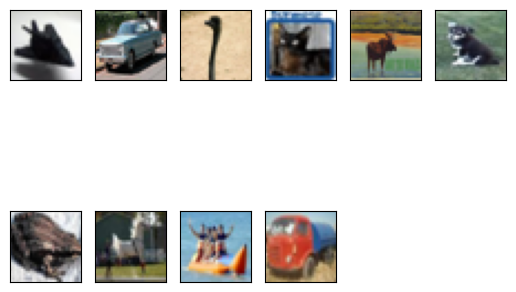

torch.Size([10000, 32, 32, 3]) torch.Size([10000, 1]) tensor([[0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.]]) torch.Size([2000, 32, 32, 3]) torch.Size([2000, 1])


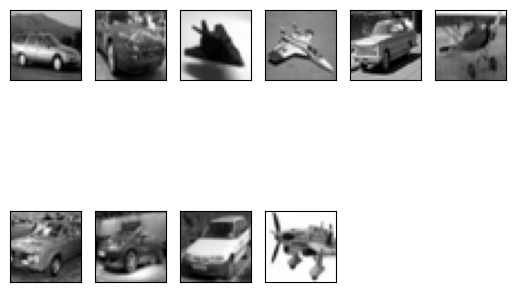

torch.Size([10000, 1024]) torch.Size([2000, 1024])


In [4]:
dtype = torch.float32

transform_data = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5)) # Apply the (x - mean)/var operation on the components of the data # if x is in [0,1] then Normalise(x) is in [-1,1] # is applied on the three channels RGB
])

# Data import
dtype = torch.float32
trainset = torchvision.datasets.CIFAR10(root = './datas', train= True, download = True, transform = transform_data)
validset = torchvision.datasets.CIFAR10(root = './datas', train = False, download = True, transform = transform_data)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 1)

x_train, y_train_raw, x_valid, y_valid_raw = torch.tensor(trainset.data), torch.tensor(trainset.targets), torch.tensor(validset.data), torch.tensor(validset.targets)

# Modification du format des données shape (n_data,1) -> (n_data, n_classes)
y_train = torch.zeros((y_train_raw.shape[0], torch.max(y_train_raw)+1))
for i, y in enumerate(y_train_raw):
    j = int(y.item())
    y_train[i,j] = 1

y_valid = torch.zeros((y_valid_raw.shape[0], torch.max(y_valid_raw)+1))
for i,y in enumerate(y_valid_raw):
    j = int(y.item())
    y_valid[i,j] = 1 
print(y_train.shape, y_valid.shape)

# Binary reduction of the classes # To avoid using softmax, we regroup classes in two classes
class_binary_reduction = True
determination_des_classes = True
black_and_white_images = True

if class_binary_reduction :
    if determination_des_classes :
        # Determination des classes
        class_list = []
        class_index = 0
        for i in range (x_train.shape[0]):
            if y_train[i, class_index] == 1:
                class_list.append(x_train[i])
                class_index += 1
            if len(class_list) == len(y_train[0]):
                break
        for i, image in enumerate(class_list):
            plt.subplot(2, int(len(class_list)/2+1),i+1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])
        plt.show()
                
    # classe1 = [0, 1, 8, 9]  # vehicles
    # classe2 = [2, 3, 4, 5]  # animals
    
    # classe1 = [1, 3, 4]  # elk, truck, dog
    # classe2 = [5, 7, 9]  # horse, car, cat

    classe1 = [0]  # elk
    classe2 = [1]  # horse
    
    # Création des masques pour les échantillons appartenant à ces classes
    mask_classe1_train = y_train[:, classe1].sum(dim=1) > 0  # True si appartient à classe1
    mask_classe2_train = y_train[:, classe2].sum(dim=1) > 0  # True si appartient à classe2
    
    mask_classe1_valid = y_valid[:, classe1].sum(dim=1) > 0
    mask_classe2_valid = y_valid[:, classe2].sum(dim=1) > 0
    
    # Filtrage des exemples concernés
    mask_train = torch.logical_or(mask_classe1_train, mask_classe2_train)
    mask_valid = torch.logical_or(mask_classe1_valid, mask_classe2_valid)
    x_train, y_train = x_train[mask_train], y_train[mask_train]
    x_valid, y_valid = x_valid[mask_valid], y_valid[mask_valid]

    # Création du vecteur de labels binaires (1 pour classe1, 0 pour classe2)
    y_train = (y_train[:, classe1].sum(dim=1) > 0).to(dtype).unsqueeze(1)
    y_valid = (y_valid[:, classe1].sum(dim=1) > 0).to(dtype).unsqueeze(1)
    
    # Avec tanh
    
    # x_train = 2*(x_train-0.5)
    # y_train = 2*(y_train-0.5)
    # x_valid = 2*(x_valid-0.5)
    # y_valid = 2*(y_valid-0.5)

    print(x_train.shape, y_train.shape, y_train[0:10], x_valid.shape, y_valid.shape)

if black_and_white_images :
    x_train = 0.299*x_train[:,:,:,0] + 0.587*x_train[:,:,:,1] + 0.114*x_train[:,:,:,2]
    x_valid = 0.299*x_valid[:,:,:,0] + 0.587*x_valid[:,:,:,1] + 0.114*x_valid[:,:,:,2]
    for i, image in enumerate(x_train[0:10]):
        plt.subplot(2, int(len(x_train[0:10])/2+1),i+1)
        plt.imshow(image, cmap = 'grey')
        plt.xticks([])
        plt.yticks([])
    plt.show()
    x_train, x_valid = (x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])).to(dtype), x_valid.reshape(x_valid.shape[0], x_valid.shape[1]*x_valid.shape[2]).to(dtype)
    print(x_train.shape, x_valid.shape)

else :    
    x_train, x_valid = (x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]*x_train.shape[3])).to(dtype), x_valid.reshape(x_valid.shape[0], x_valid.shape[1]*x_valid.shape[2]*x_valid.shape[3]).to(dtype)
    print(x_train.shape, x_valid.shape)

In [7]:
##### 08/07 - Correlations between representations on CIFAR-10 : car-plane #####



date = '01_07_25'

dataset = 'c-p_muP'

save_path = 'Post-processing/10_07_25/'
save_path_convergence_speed = save_path + 'Convergence speed/Dataset_' + dataset + '_statistical_results/'
save_path_normalized_convergence_speed = save_path + 'Normalized convergence speed/Dataset_' + dataset + '_statistical_results/'
save_path_max_accuracy = save_path + 'Maximum accuracy/Dataset_' + dataset + '_statistical_results/'
save_path_accuracy_trajectory = save_path + 'Accuracy trajectory/Dataset_' + dataset + '_statistical_results/'
save_path_loss_trajectory = save_path + 'Loss trajectory/Dataset_' + dataset + '_statistical_results/'
save_path_overlap = save_path + 'Overlaps/Dataset_' + dataset + '/'
save_path_covariances = save_path + 'Covariances/Dataset_' + dataset + '/'


os.makedirs(save_path_convergence_speed, exist_ok=True)
os.makedirs(save_path_normalized_convergence_speed, exist_ok=True)
os.makedirs(save_path_max_accuracy, exist_ok=True)
os.makedirs(save_path_accuracy_trajectory, exist_ok=True)
os.makedirs(save_path_loss_trajectory, exist_ok=True)
os.makedirs(save_path_overlap, exist_ok=True)
os.makedirs(save_path_covariances, exist_ok=True)


model_ref_1 = pp.load_data_dictionnary("CIFAR10_torch_model_(1024+1024.2+1)_" + dataset + '_fully_trained_1', date)
model_ref_2 = pp.load_data_dictionnary("CIFAR10_torch_model_(1024+1024.2+1)_" + dataset + '_fully_trained_2', date)
pp.representation_overlap_trajectories_2(model_ref_1, model_ref_2, x_valid, save_path=save_path_overlap, architecture='(1024+1024.2+1)', add_to_title=' two fully trained networks')


Number of steps to compare: 149


RuntimeError: The size of tensor a (2000) must match the size of tensor b (1024) at non-singleton dimension 1